# Synthetic Nervous Systems: Spring 2021
## Homework 1: Solutions/Grading Key
### William Nourse, February 24th, 2021

# 1. Single Neuron Exercise (10pts)

## a. Start with the neuron response equation. Transform it to be in terms of U instead. (1 pt)

$$ C_m\cdot\frac{dV}{dt} = G_m\cdot(E_r-V)+I_{app}$$
$$ C_m\cdot\frac{dU}{dt} = G_m\cdot(E_r-(U+E_r))+I_{app}$$
### $$ C_m\cdot\frac{dU}{dt} = G_m\cdot U+I_{app}$$

## b. Start a new programming script. Write a single-neuron simulator, in which your program calculates $U_{sim}(t)$ and plots it. Give the neuron a step input and save the plot. (1 pt)

Text(0.5, 1.0, 'U')

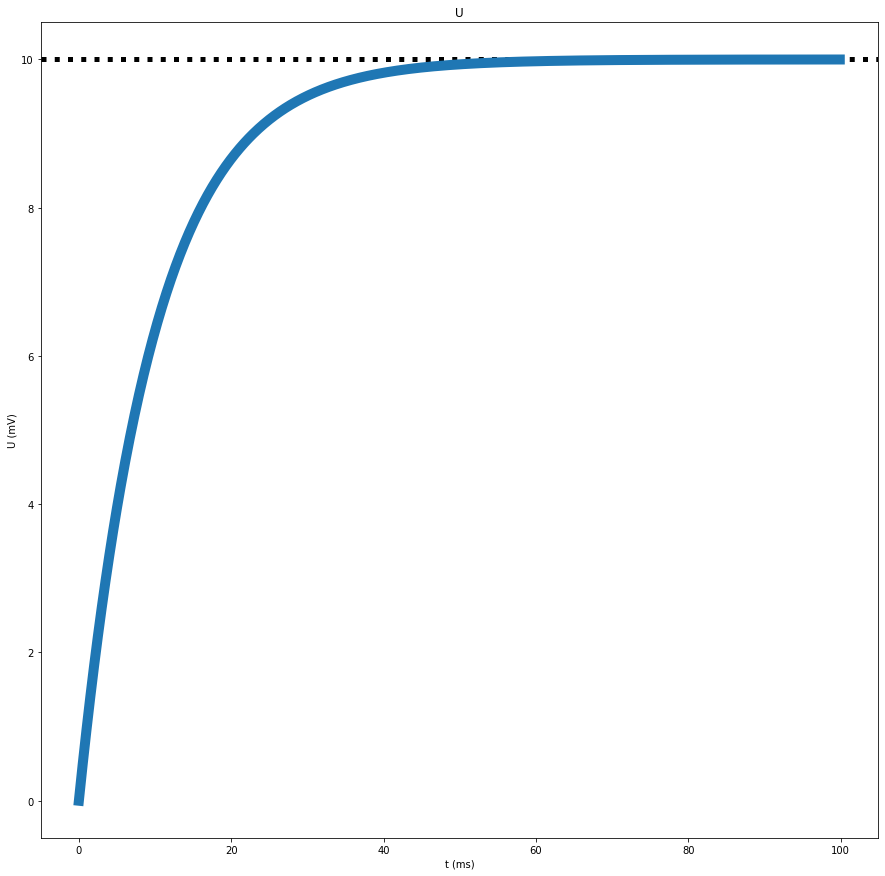

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
#%matplotlib widget

# Variables
Cm = 10 # nF
Gm = 1 # uS
Iapp = 10 # nA
dt = 0.1 # ms
tmax = 100 # ms

t = np.arange(0,tmax,dt)
numSteps = np.size(t)

# Compute U(t) with simulation
Usim = np.zeros(np.size(t))

for i in range(1,numSteps):
    Usim[i] = Usim[i-1] + dt/Cm*(Iapp - Gm*Usim[i-1])
    
plt.figure(figsize=(15,15))
plt.axhline(y=Iapp,linestyle=':',color='k',linewidth=5)
plt.plot(t,Usim,label='Simulated',linewidth=10)
plt.ylabel('U (mV)')
plt.xlabel('t (ms)')
plt.title('U')

## c. Solve the differential equation in a) and determine the step response of a neuron analytically. Assume that the input is Iapp, so the neuron voltage response to a step input current. Have your program plot this response, Uexact(t), along with your simulated solution. (1 pt)
### $$U(t) = \frac{I_{app}}{G_m}\cdot(1-e^{-t/\tau_m})$$

Text(0.5, 1.0, 'U')

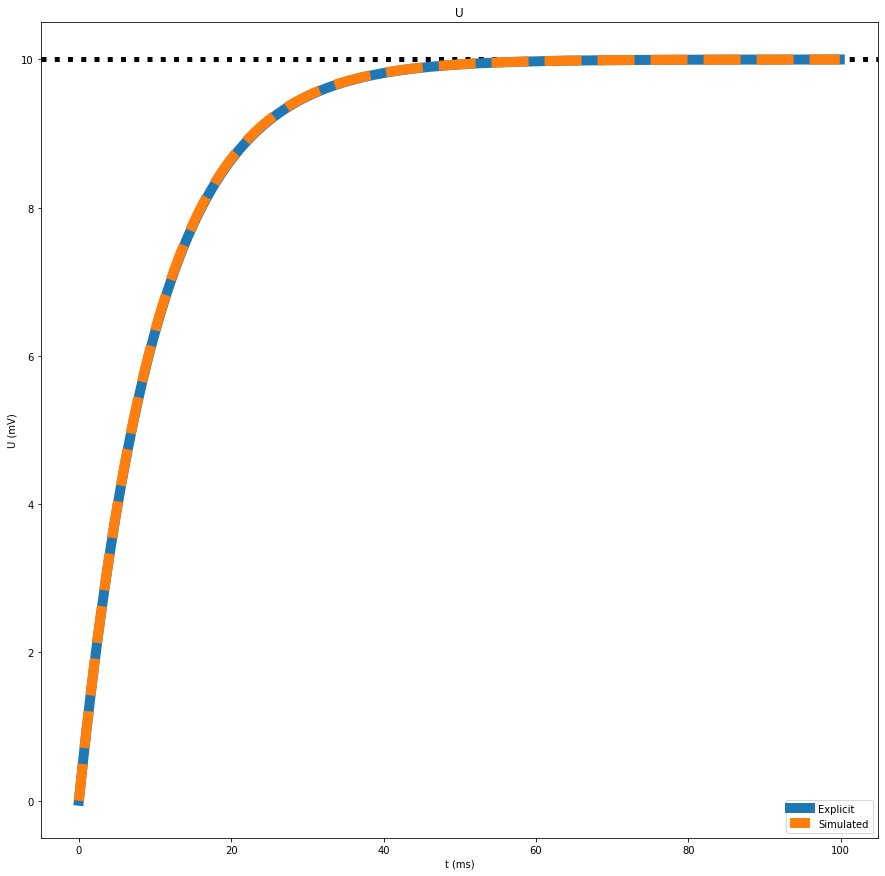

In [2]:
# Compute U(t) explicitly
tau = Cm/Gm
Uexp = Iapp/Gm*(1-np.exp(-t/tau))

# Compare with the simulated solution
plt.figure(figsize=(15,15))
plt.axhline(y=Iapp,linestyle=':',color='k',linewidth=5)
plt.plot(t,Uexp,label='Explicit',linewidth=10)
plt.plot(t,Usim,'--',label='Simulated',linewidth=10)
plt.legend()
plt.ylabel('U (mV)')
plt.xlabel('t (ms)')
plt.title('U')

## d. How large of a time step should your simulation use?

## d. i. First calculate what the theoretical upper bound is, given the time constant of your choice. (1 pt)
### For Stable Simulation: $\Delta t = 2\tau_m$, For Real Simulation: $\Delta t = \tau_m$
### So in my example, those are $\Delta t$'s of 20 or 10, respectively

## d. ii. Create a loop wherein you repeat your simulated and exact solution with a different time step each time. Begin with the theoretically largest possible time step, and then divide by 10 every time you complete the loop. Do this to test 5 values. (1 pt)
## d. iii. Each time through the loop, save both the mean accuracy of the simulated values compared to the exact solution, and the time needed to complete the computation. Run your simulation for a long time (1000 times the duration of your largest time step) so that you notice a difference in the time taken to complete the simulation in the loop. (1 pt)
## d. iv. Plot the accuracy of the simulation versus the simulation time step, and the time needed to complete the computation versus the simulation time step. Use logarithmic axes to better observe these changes. (1 pt)
### Stable:

20.0
2.0
0.2
0.02
0.002


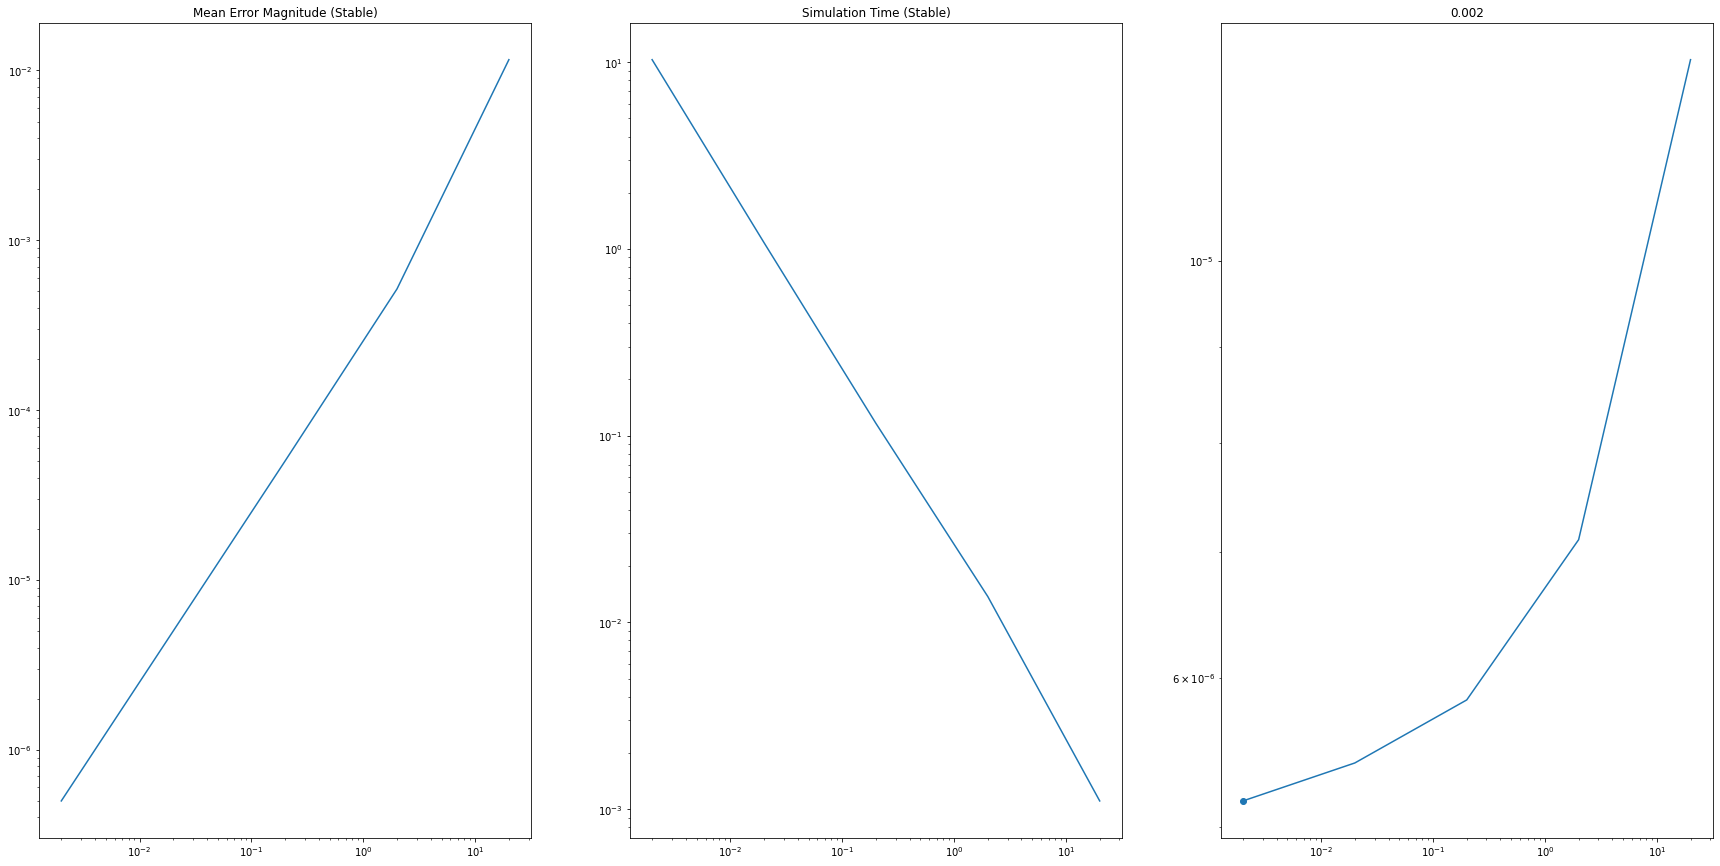

In [3]:
from time import time
dts = [2*tau,2*tau/10,2*tau/100,2*tau/1000,2*tau/10000]
error = np.zeros(np.size(dts))
times = np.zeros(np.size(dts))
for i in range(np.size(dts)):
    print(dts[i])
    tic = time()
    t = np.arange(0,1000*2*tau,dts[i])
    numSteps = np.size(t)
    Uexp = Iapp/Gm*(1-np.exp(-t/tau))

    # Compute U(t) with simulation
    Usim = np.zeros(np.size(t))

    for j in range(1,numSteps):
        Usim[j] = Usim[j-1] + dts[i]/Cm*(Iapp - Gm*Usim[j-1])
    toc = time()
    error[i] = np.mean(Usim-Uexp)
    times[i] = toc - tic
    
plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(dts,error)
plt.xscale('log')
plt.yscale('log')
plt.title('Mean Error Magnitude (Stable)')

plt.subplot(1,3,2)
plt.plot(dts,times)
plt.xscale('log')
plt.yscale('log')
plt.title('Simulation Time (Stable)')

plt.subplot(1,3,3)
plt.plot(dts,error*times)
plt.title(str(dts[np.argmin(error*times)]))
plt.scatter(dts[np.argmin(error*times)],min(error*times))
plt.xscale('log')
plt.yscale('log')

### Real

10.0
1.0
0.1
0.01
0.001


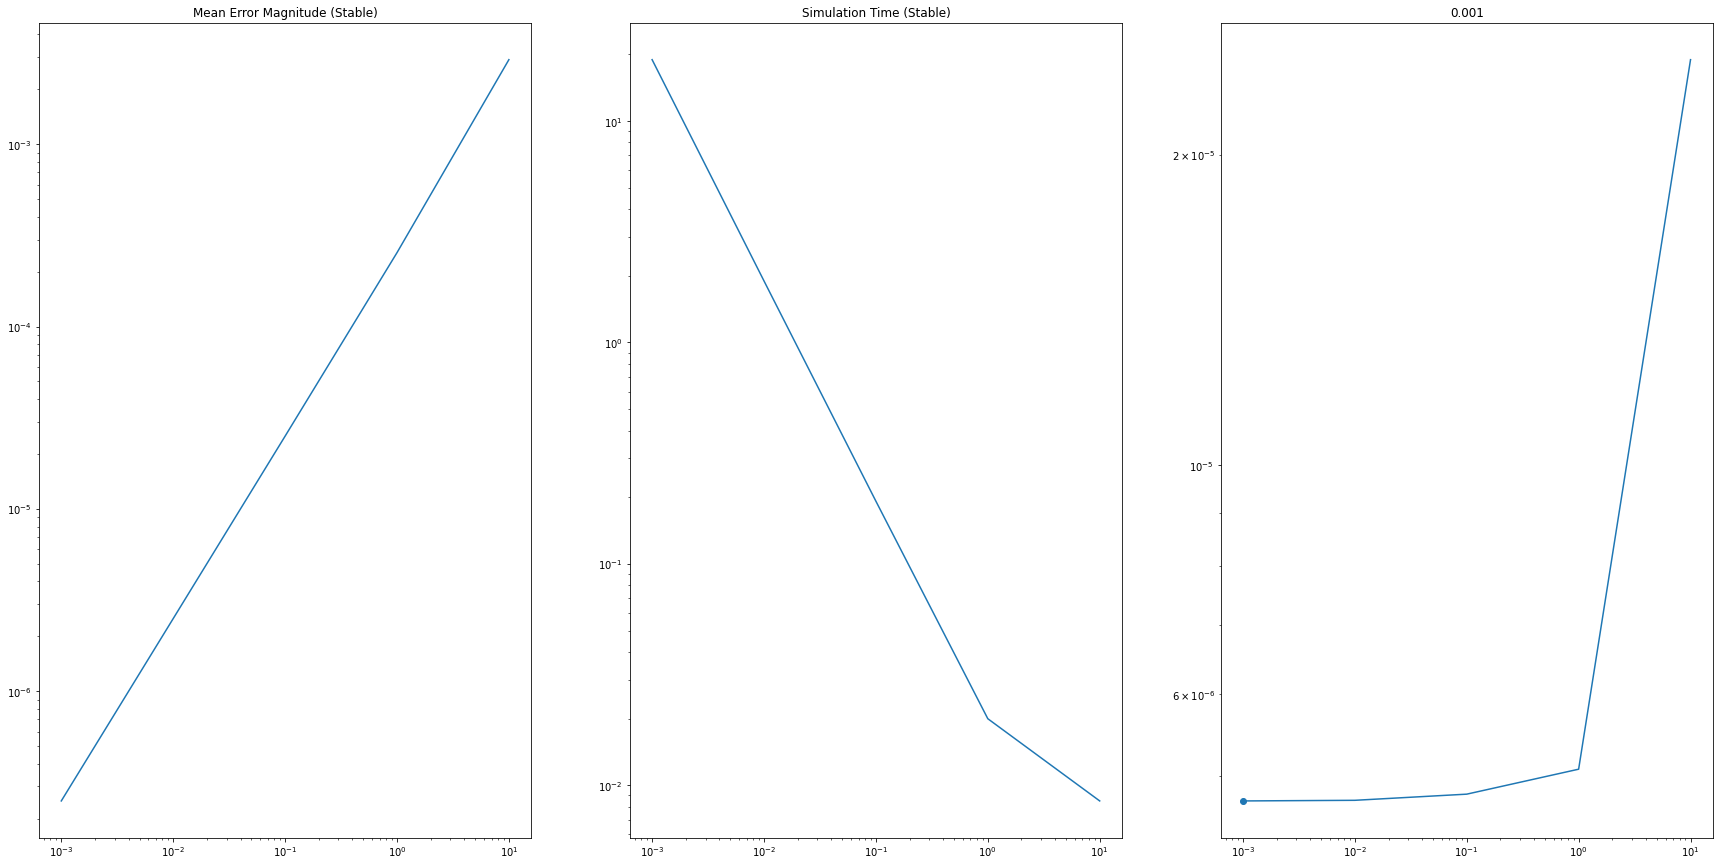

In [4]:
dts = [tau,tau/10,tau/100,tau/1000,tau/10000]
error = np.zeros(np.size(dts))
times = np.zeros(np.size(dts))
for i in range(np.size(dts)):
    print(dts[i])
    tic = time()
    t = np.arange(0,1000*2*tau,dts[i])
    numSteps = np.size(t)
    Uexp = Iapp/Gm*(1-np.exp(-t/tau))

    # Compute U(t) with simulation
    Usim = np.zeros(np.size(t))

    for j in range(1,numSteps):
        Usim[j] = Usim[j-1] + dts[i]/Cm*(Iapp - Gm*Usim[j-1])
    toc = time()
    error[i] = np.mean(Usim-Uexp)
    times[i] = toc - tic
    
plt.figure(figsize=(30,15))
plt.subplot(1,3,1)
plt.plot(dts,error)
plt.xscale('log')
plt.yscale('log')
plt.title('Mean Error Magnitude (Stable)')

plt.subplot(1,3,2)
plt.plot(dts,times)
plt.xscale('log')
plt.yscale('log')
plt.title('Simulation Time (Stable)')

plt.subplot(1,3,3)
plt.plot(dts,error*times)
plt.title(str(dts[np.argmin(error*times)]))
plt.scatter(dts[np.argmin(error*times)],min(error*times))
plt.xscale('log')
plt.yscale('log')

## d. v. Write: are their clear trends in these metrics as the time step changes? Is there an optimal time step based on these two metrics? Can you predict the optimal time step based on the neuron’s parameter values? (1 pt)

### They could answer this question different ways (would prefer the Real scenario, but they may do the Stable scenario). The key takeaway though is that as dt increases, error magnitude goes up and simulation time goes down. You can find the "ideal" timestep by multiplying the errors by the time, and the lowest resulting value corresponds to the timestep. In this case, it is around 0.1 or 0.3, or maxDt/1000. Depending on which technique they chose.

## e. Differentiate the step response of the neuron in c) to determine the impulse response. (1 pt)

$$ impulse = \frac{d}{dt}(1-e^{-t/\tau_m})$$
### $$ impulse = \frac{1}{\tau_m}e^{-t/\tau_m}$$

## f. Convolve your input current with the impulse response to calculate the response of the neuron. Plot this solution for U(t) along with or on top of your others. (1 pt)

Text(0.5, 1.0, 'U')

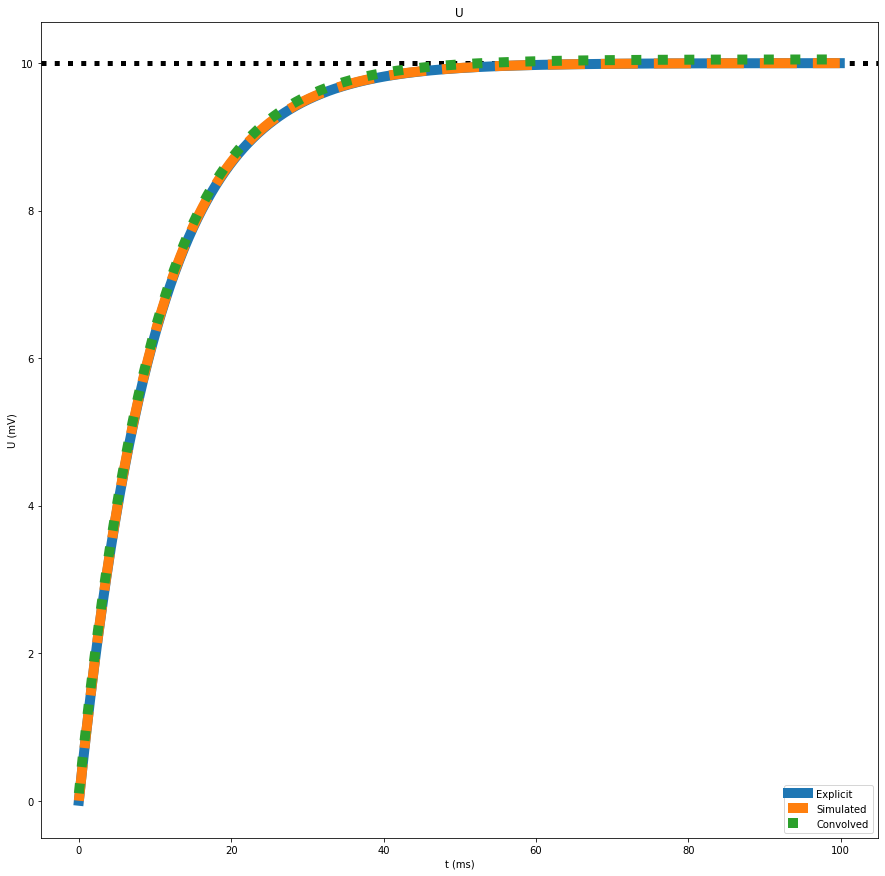

In [5]:
# Variables
Cm = 10 # nF
Gm = 1 # uS
Iapp = 10 # nA
dt = 0.1 # ms
tmax = 100 # ms

t = np.arange(0,tmax,dt)
numSteps = np.size(t)

# Compute U(t) with simulation
Usim = np.zeros(np.size(t))

for i in range(1,numSteps):
    Usim[i] = Usim[i-1] + dt/Cm*(Iapp - Gm*Usim[i-1])
    
# Compute U(t) explicitly
tau = Cm/Gm
Uexp = Iapp/Gm*(1-np.exp(-t/tau))

# Compute impulse response
Uimp = 1/tau*np.exp(-t/tau)
Uconv = dt*np.convolve(Iapp+np.zeros(numSteps),Uimp)

# Compare with the simulated solution
plt.figure(figsize=(15,15))
plt.axhline(y=Iapp,linestyle=':',color='k',linewidth=5)
plt.plot(t,Uexp,label='Explicit',linewidth=10)
plt.plot(t,Usim,'--',label='Simulated',linewidth=10)
plt.plot(t,Uconv[0:numSteps],':',label='Convolved',linewidth=10)
plt.legend()
plt.ylabel('U (mV)')
plt.xlabel('t (ms)')
plt.title('U')

# 2. Synapse Design Exercise (10 pts)

## a. Save a new script based on your single neuron script.
## b. Design a signal transmission synapse with k=1, R=20,Esyn=-20mV. (2 pts)
$$ g_{syn} = \frac{k\cdot R}{\Delta E_{syn} - k\cdot R} = \frac{k\cdot R}{(E_{syn}-E_r) - k\cdot R}$$
$$ g_{syn} = \frac{20}{40-20}$$
### $$ g_{syn} = 1 \mu S$$
## c. Add the new synapse and a presynaptic neuron to your simulation. Run the simulation and make sure that the results make sense. Plot U1,sim(t) and U2,sim(t). (2 pts)

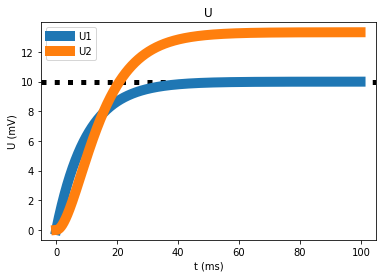

In [6]:
# Variables
Cm = 10 # nF
Gm = 1 # uS
Iapp = 10 # nA
dt = 0.1 # ms
tmax = 100 # ms

t = np.arange(0,tmax,dt)
numSteps = np.size(t)

k = 1
R = 20
Esyn = -20
Er = -60
delEsyn = Esyn - Er
gSyn = (k*R)/(delEsyn-k*R)

# Compute U(t) with simulation
U1sim = np.zeros(np.size(t))
U2sim = np.zeros(np.size(t))

for i in range(1,numSteps):
    U1sim[i] = U1sim[i-1] + dt/Cm*(Iapp - Gm*U1sim[i-1])
    U2sim[i] = U2sim[i-1] + dt/Cm*(gSyn*min(max(U1sim[i-1]/R,0),1)*(delEsyn-U2sim[i-1]) - Gm*U2sim[i-1])
    
#plt.figure(figsize=(15,15))
plt.figure()
plt.axhline(y=Iapp,linestyle=':',color='k',linewidth=5)
plt.plot(t,U1sim,label='U1',linewidth=10)
plt.plot(t,U2sim,label='U2',linewidth=10)
plt.ylabel('U (mV)')
plt.xlabel('t (ms)')
plt.title('U')
plt.legend()

## d. Calculate the postsynaptic neuron’s steady-state voltage U2* as a function of U1(t).  U2* should be a vector as long as U1(t). (2 pts)

$$ U_2^* = \frac{g_{syn}\frac{U_1(t)}{R}\Delta E_{syn}}{1+g_{syn}\frac{U_1(t)}{R}} $$

## U2* should be a vector as long as U1(t). Convolve U2* with neuron 2’s impulse response. Plot this along with your simulated solution. Is the convolved response the same as the simulated solution. Do they have the same steady-state value? Does one solution appear to have faster dynamics than the other? If there are differences, why do they arise? Write out your response, pointing to mathematical reasons as to why this could be. (2 pts)

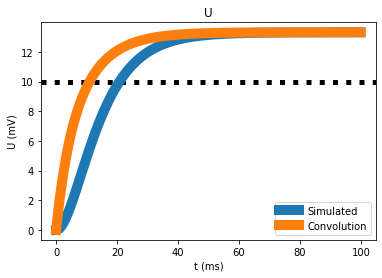

In [7]:
U2str = (gSyn*U1sim/R*delEsyn)/(1+gSyn*U1sim/R)
U2conv = dt*np.convolve(U2str,Uimp)
plt.figure()
plt.axhline(y=Iapp,linestyle=':',color='k',linewidth=5)
plt.plot(t,U2sim,label='Simulated',linewidth=10)
plt.plot(t,U2str,label='Convolution',linewidth=10)
plt.ylabel('U (mV)')
plt.xlabel('t (ms)')
plt.title('U')
plt.legend()

### The steady-state behavior of the simulated and convolved solutions are the same, however the transient behavior is very different. When we did the convolved solution, we treated the input from the presynaptic neuron as if it were at steady-state, even though it isn't. Additionally, the convolution can only accurately be used to calculate the output of an LTI system. Because of the synaptic connection, this system is no longer LTI.

## e. Design a modulation synapse with c=50%. Add the new synapse and a presynaptic neuron to your simulation, with the synapse modulating U2. Plot U1,sim(t) and U2,sim(t). (2 pts)

$$ g_{mod} = \frac{1}{C}-1 = 2 -1 = 1\mu S$$

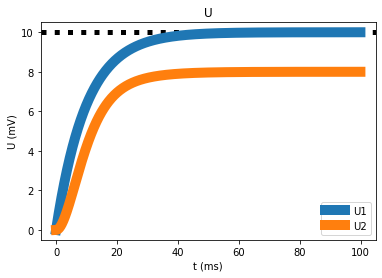

In [8]:
gMod = 1
delEmod = 0
# Compute U(t) with simulation
U1sim = np.zeros(np.size(t))
U2sim = np.zeros(np.size(t))
Umod = np.zeros(np.size(t))
Imod = R
Iapp = 10

for i in range(1,numSteps):
    U1sim[i] = U1sim[i-1] + dt/Cm*(Iapp - Gm*U1sim[i-1])
    Umod[i] = Umod[i-1] + dt/Cm*(Imod - Gm*Umod[i-1])
    U2sim[i] = U2sim[i-1] + dt/Cm*(gSyn*min(max(U1sim[i-1]/R,0),1)*(delEsyn-U2sim[i-1]) + gMod*min(max(Umod[i-1]/R,0),1)*(delEmod-U2sim[i-1]) - Gm*U2sim[i-1])
    
#plt.figure(figsize=(15,15))
plt.figure()
plt.axhline(y=Iapp,linestyle=':',color='k',linewidth=5)
plt.plot(t,U1sim,label='U1',linewidth=10)
plt.plot(t,U2sim,label='U2',linewidth=10)
plt.ylabel('U (mV)')
plt.xlabel('t (ms)')
plt.title('U')
plt.legend()

# 3. Arithmetic Network Design Exercise (10 pts)
## a. Design an addition subnetwork with the following gains: k1 = 0.75, k2 = 0.5 (3 pts)
$$ R = 20,\; \Delta E_{add} = 100$$
$$ g_{add} = \frac{k\cdot R}{\Delta E_{add} - k\cdot R}$$
$$ g_{1} = \frac{0.75\cdot 20}{100 - 0.75\cdot 20} = \frac{3}{17}$$
$$ g_{2} = \frac{0.5\cdot 20}{100 - 0.5\cdot 20} = \frac{1}{9}$$
$$ U_3^* = \frac{g_1\cdot\frac{U_1^*}{R}\cdot\Delta E_{add} + g_2\cdot\frac{U_2^*}{R}\cdot\Delta E_{add}}{1 + g_1\cdot\frac{U_1^*}{R} + g_2\cdot\frac{U_2^*}{R}}$$
## b. Plot the output U3 as a function of U1 and U2. This should be a 3-dimensional curve, similar to the example in class. (2 pts)

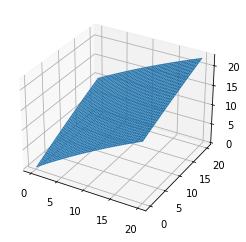

In [9]:
g1 = (0.75*R)/(100-0.75*R)
g2 = (0.5*R)/(100-0.5*R)

ran = np.linspace(0,R)
U1str, U2str = np.meshgrid(ran,ran)
U3str = (g1*U1str/R*100 + g2*U2str/R*100)/(1+g1*U1str/R + g2*U2str/R)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(U1str,U2str,U3str)

## c. Modify your subnetwork so that it is a subtraction network with the following gains: k1 = 0.75, k2 = 0.5 (3 pts)
$$ \Delta E_{sub} = -100$$
$$ g_2 = \frac{-k\cdot R}{\Delta E_{sub}+k\cdot R}$$
$$g_2 = \frac{1}{9}$$
$$ U_3^* = \frac{g_1\cdot\frac{U_1^*}{R}\cdot\Delta E_{add} + g_2\cdot\frac{U_2^*}{R}\cdot\Delta E_{sub}}{1 + g_1\cdot\frac{U_1^*}{R} + g_2\cdot\frac{U_2^*}{R}}$$

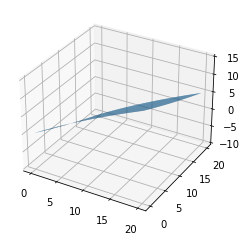

In [10]:
g1 = (0.75*R)/(100-0.75*R)
g2 = (-0.5*R)/(-100+0.5*R)

ran = np.linspace(0,R)
U1str, U2str = np.meshgrid(ran,ran)
U3str = (g1*U1str/R*100 + g2*U2str/R*-100)/(1+g1*U1str/R + g2*U2str/R)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(U1str,U2str,U3str)

# Part II: Introduction to Animatlab 2 (10 pts)

## Please follow and refer to the Animatlab tutorial on Canvas for the detailed procedure and corresponding images. For your report, please include screenshots of the final DataTool_1 and DataTool_2 windows. Rename these as “abc123_Basics” and “abc123_Servo”, where abc123 is your personal network ID.